In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles, make_moons

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

# Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [3]:
X, y = make_circles(n_samples=500, factor=.75, noise=.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

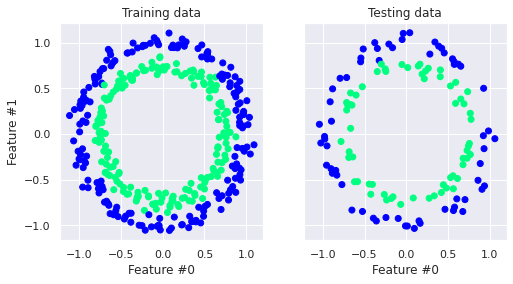

In [4]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter')
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [5]:
inputs = tf.keras.layers.Input([2,])
x = tf.keras.layers.Normalization()(inputs)
for i in range(5):
  x = tf.keras.layers.Dense(6, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')

In [10]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=100,)# use_multiprocessing=True)

Epoch 1/100
12/12 [==============================] - 1s 49ms/step - loss: 0.6928 - accuracy: 0.5280 - val_loss: 0.6935 - val_accuracy: 0.4640
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5493 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.5413 - val_loss: 0.6932 - val_accuracy: 0.4640
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6923 - accuracy: 0.5280 - val_loss: 0.6931 - val_accuracy: 0.4720
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.6921 - accuracy: 0.5093 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6919 - accuracy: 0.5440 - val_loss: 0.6929 - val_accuracy: 0.4880
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5360 - val_loss: 0.6926 - val_accuracy: 0.4720
Epoch 8/1

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                             

In [12]:
def plot_history(history, metric=None):
  ans = history.history

  pd.Series(ans['loss']).plot()
  pd.Series(ans[f'val_loss']).plot()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  if metric is not None:
    pd.Series(ans[metric]).plot()
    pd.Series(ans[f'val_{metric}']).plot()
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.show()

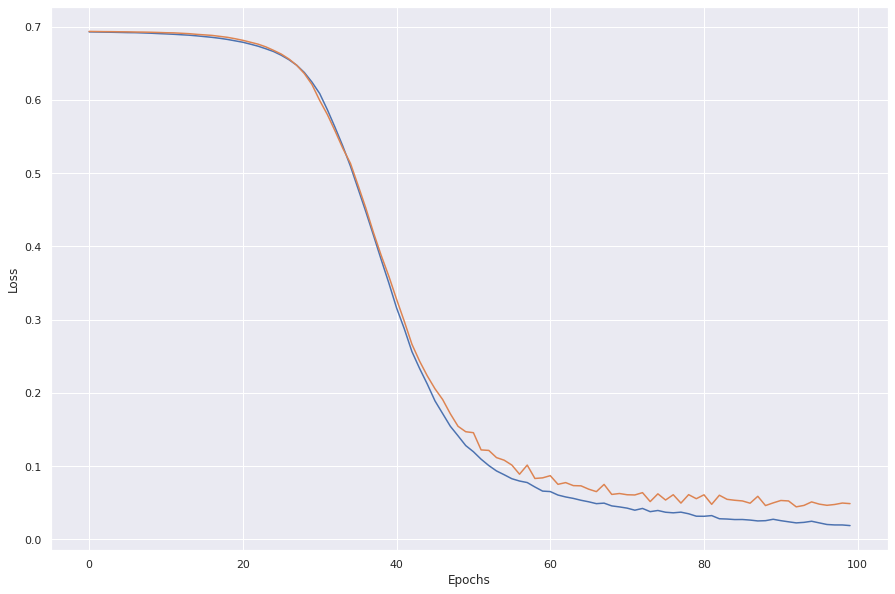

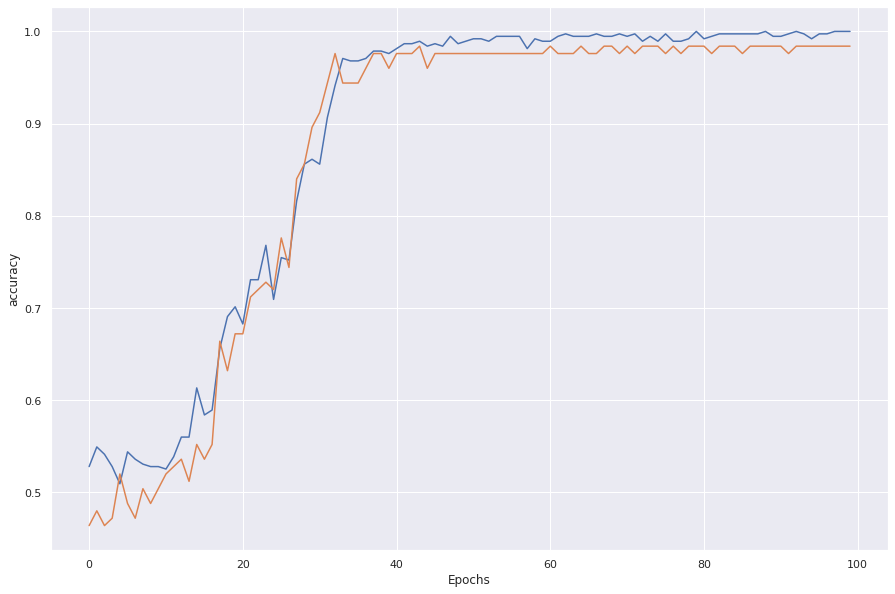

In [13]:
plot_history(history, metric='accuracy')

# Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [21]:
X, y = make_moons(n_samples=500, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

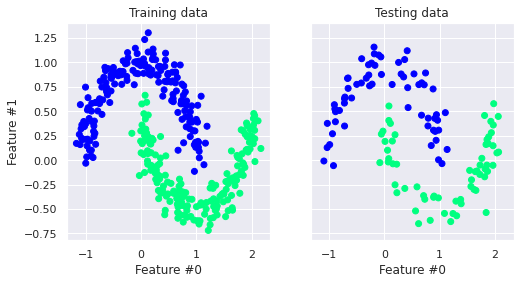

In [22]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter')
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [23]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=100,)# use_multiprocessing=True)

Epoch 1/100
12/12 [==============================] - 2s 37ms/step - loss: 5.4253 - accuracy: 0.6827 - val_loss: 6.5087 - val_accuracy: 0.5840
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 4.5443 - accuracy: 0.6800 - val_loss: 5.5698 - val_accuracy: 0.5760
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 3.8816 - accuracy: 0.6747 - val_loss: 4.8689 - val_accuracy: 0.5680
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 3.3623 - accuracy: 0.6613 - val_loss: 4.2719 - val_accuracy: 0.5840
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 2.9324 - accuracy: 0.6693 - val_loss: 3.7569 - val_accuracy: 0.6000
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 2.5567 - accuracy: 0.6800 - val_loss: 3.3063 - val_accuracy: 0.5840
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 2.2163 - accuracy: 0.6827 - val_loss: 2.8790 - val_accuracy: 0.6080
Epoch 8/10

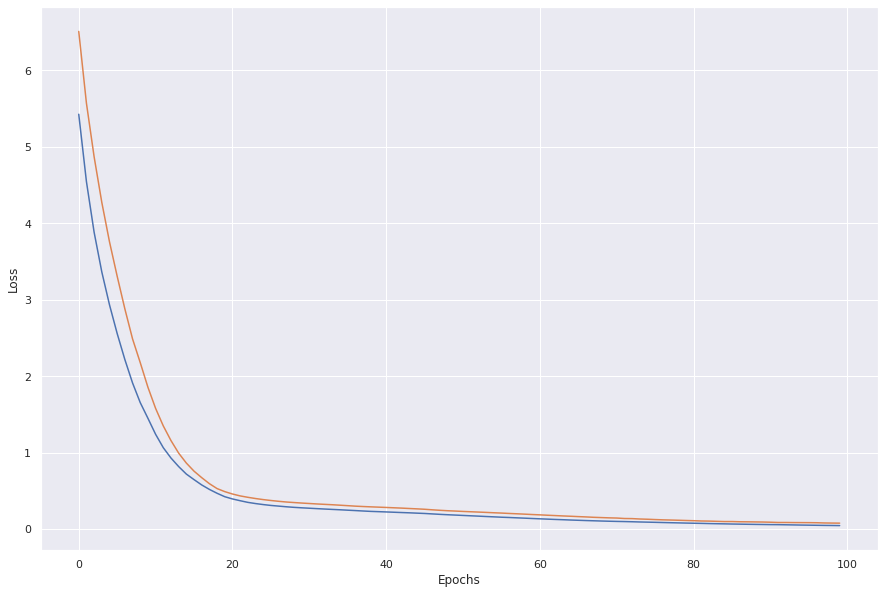

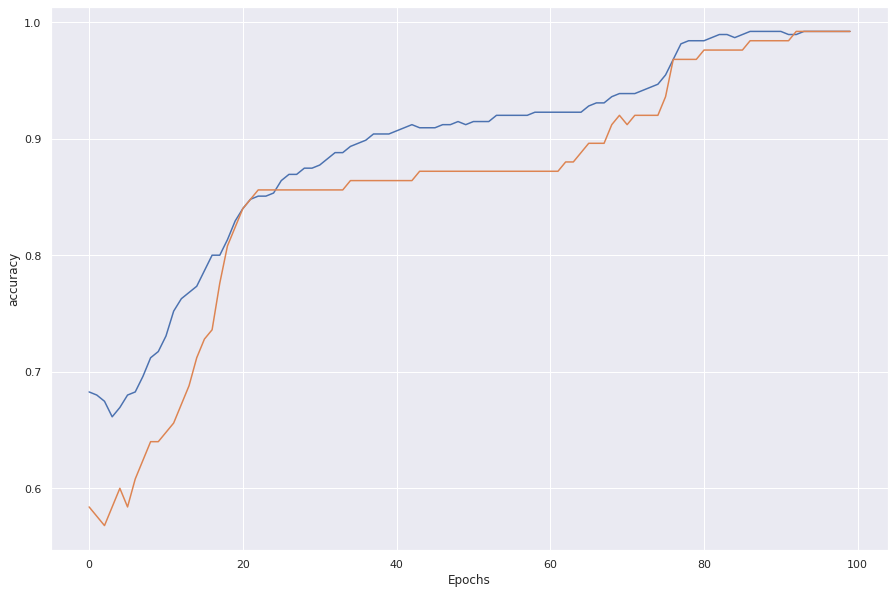

In [25]:
plot_history(history, metric='accuracy')

# Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [26]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


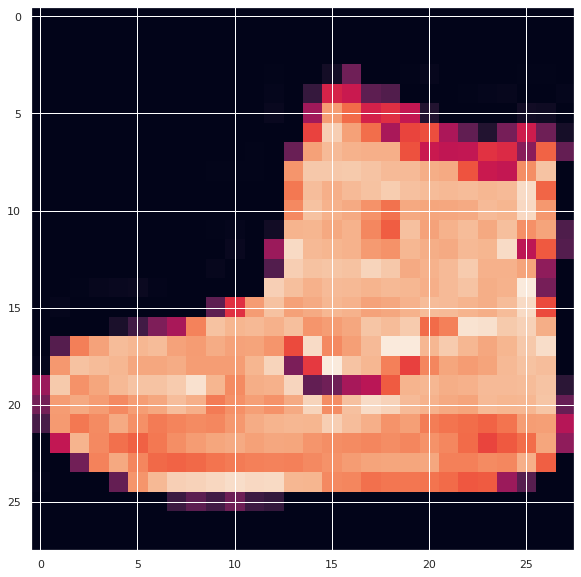

In [29]:
plt.imshow(train_data[0])

In [37]:
rng = tf.random.Generator.from_seed(42).uniform([4,], minval=0, maxval=len(train_data)+1, dtype=tf.int32).numpy()
rng

array([41692, 25918, 46161, 46260], dtype=int32)

In [68]:
def plot_4(train_data):

  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rng = tf.random.Generator.from_non_deterministic_state()
    rand_index = rng.uniform(shape=[1,], minval=0, maxval=len(train_data)+1, dtype=tf.int32).numpy()
    plt.imshow(tf.squeeze(train_data[rand_index], axis=0), cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index][0]])
    plt.axis(False)
  plt.show()

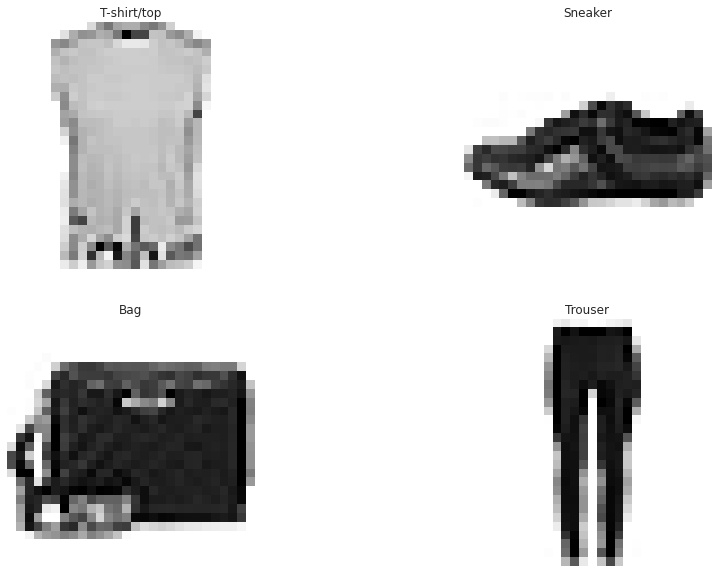

In [70]:
plot_4(train_data)

# Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [79]:
def tf_softmax(tensor):

  return tf.math.exp(tensor)  /  \
  tf.reduce_sum(tf.math.exp(tensor))

In [87]:
for tns in [4, [4,], [4, 2], [[4,2], [8,1]]]:
  print(tns, tf_softmax(tf.constant(tns, dtype=tf.float32)))

4 tf.Tensor(1.0, shape=(), dtype=float32)
[4] tf.Tensor([1.], shape=(1,), dtype=float32)
[4, 2] tf.Tensor([0.8807971  0.11920293], shape=(2,), dtype=float32)
[[4, 2], [8, 1]] tf.Tensor(
[[1.7926520e-02 2.4260907e-03]
 [9.7875488e-01 8.9250889e-04]], shape=(2, 2), dtype=float32)


# Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [89]:
train_data[0].shape

(28, 28)

In [91]:
train_labels[0]

9

In [99]:
one, two = tf.unique(train_labels)
one.numpy(), two.numpy()

(array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8),
 array([0, 1, 1, ..., 2, 1, 5], dtype=int32))

In [100]:
len(one.numpy())

10

In [125]:
28*28

784

In [126]:
BATCH_SIZE=32

In [136]:
train_data.shape

(60000, 28, 28)

In [211]:
# # WIP
# inputs = tf.keras.layers.Input(shape=(train_data.shape[1], train_data.shape[2]))
# x = tf.keras.layers.Normalization()(inputs)
# x = tf.keras.layers.Reshape(target_shape=[-1, flattened])(x)

# x = tf.keras.layers.Dense(200, activation='relu')(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)
# ouputs = tf.keras.layers.Dense(len(one.numpy()), activation='softmax')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizers='Adam', loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy',)# batch_size=BATCH_SIZE)

In [212]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy')

In [214]:
history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.8887 - val_loss: 0.4901 - val_sparse_categorical_accuracy: 0.8409
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3117 - sparse_categorical_accuracy: 0.8892 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8540
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.4549 - val_sparse_categorical_accuracy: 0.8598
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3110 - sparse_categorical_accuracy: 0.8894 - val_loss: 0.4669 - val_sparse_categorical_accuracy: 0.8582
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2954 - sparse_categorical_accuracy: 0.8937 - val_loss: 0.5095 - val_sparse_categorical_accuracy: 0.8519
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3050 - spa

In [216]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy')

history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 43s 23ms/step - loss: 1.3508 - sparse_categorical_accuracy: 0.7627 - val_loss: 0.6008 - val_sparse_categorical_accuracy: 0.7928
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4842 - sparse_categorical_accuracy: 0.8274 - val_loss: 0.4498 - val_sparse_categorical_accuracy: 0.8335
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4197 - sparse_categorical_accuracy: 0.8480 - val_loss: 0.4433 - val_sparse_categorical_accuracy: 0.8401
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4036 - sparse_categorical_accuracy: 0.8557 - val_loss: 0.4313 - val_sparse_categorical_accuracy: 0.8525
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3868 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.4374 - val_sparse_categorical_accuracy: 0.8460
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - spa

In [217]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy')

history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7971 - sparse_categorical_accuracy: 0.7673 - val_loss: 0.5182 - val_sparse_categorical_accuracy: 0.8210
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4816 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.5621 - val_sparse_categorical_accuracy: 0.8127
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4346 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.4361 - val_sparse_categorical_accuracy: 0.8480
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4028 - sparse_categorical_accuracy: 0.8554 - val_loss: 0.4843 - val_sparse_categorical_accuracy: 0.8413
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.4639 - val_sparse_categorical_accuracy: 0.8382
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3695 - spars

In [218]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(64, activation='swish'))
model.add(tf.keras.layers.Dense(64, activation='swish'))
model.add(tf.keras.layers.Dense(64, activation='swish'))
model.add(tf.keras.layers.Dense(64, activation='swish'))
model.add(tf.keras.layers.Dense(64, activation='swish'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy', callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=3)])

history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=50)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7972 - sparse_categorical_accuracy: 0.7630 - val_loss: 0.6157 - val_sparse_categorical_accuracy: 0.7811
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4713 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.5200 - val_sparse_categorical_accuracy: 0.8103
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4305 - sparse_categorical_accuracy: 0.8459 - val_loss: 0.4800 - val_sparse_categorical_accuracy: 0.8271
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4025 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.4147 - val_sparse_categorical_accuracy: 0.8471
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3852 - sparse_categorical_accuracy: 0.8600 - val_loss: 0.4008 - val_sparse_categorical_accuracy: 0.8520
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3725 - spar

In [223]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.005), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy', )

history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=30, callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=3)])

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9483 - sparse_categorical_accuracy: 0.7543 - val_loss: 0.5070 - val_sparse_categorical_accuracy: 0.8221 - lr: 0.0050
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5299 - sparse_categorical_accuracy: 0.8127 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.7943 - lr: 0.0050
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5246 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.4836 - val_sparse_categorical_accuracy: 0.8310 - lr: 0.0050
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5322 - sparse_categorical_accuracy: 0.8182 - val_loss: 0.5211 - val_sparse_categorical_accuracy: 0.8271 - lr: 0.0050
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5268 - sparse_categorical_accuracy: 0.8222 - val_loss: 0.6088 - val_sparse_categorical_accuracy: 0.7996 - lr: 0.0050
Epoch 6/30
1875/1875 [==

In [224]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(one.numpy()), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='sparse_categorical_accuracy', )

history = model.fit(train_data, train_labels, validation_data=[test_data, test_labels], epochs=30, callbacks=[tf.keras.callbacks.ReduceLROnPlateau(patience=3)])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8215 - sparse_categorical_accuracy: 0.7620 - val_loss: 0.5565 - val_sparse_categorical_accuracy: 0.8020 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4789 - sparse_categorical_accuracy: 0.8308 - val_loss: 0.4912 - val_sparse_categorical_accuracy: 0.8270 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4348 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.5977 - val_sparse_categorical_accuracy: 0.8005 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4097 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.4219 - val_sparse_categorical_accuracy: 0.8489 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3897 - sparse_categorical_accuracy: 0.8595 - val_loss: 0.4673 - val_sparse_categorical_accuracy: 0.8387 - lr: 0.0010
Epoch 6/30
1875/1875 [===

In [232]:
y_preds = model.predict(test_data)

In [233]:
test_labels.shape, y_preds.shape

((10000,), (10000, 10))

In [241]:
vec = tf.argmax(y_preds, axis=1).numpy()

In [242]:
tf.squeeze(test_labels).shape

TensorShape([10000])

In [243]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, vec)

In [246]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [249]:
import numpy as np

In [253]:
np.arange(11,0,-1)

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

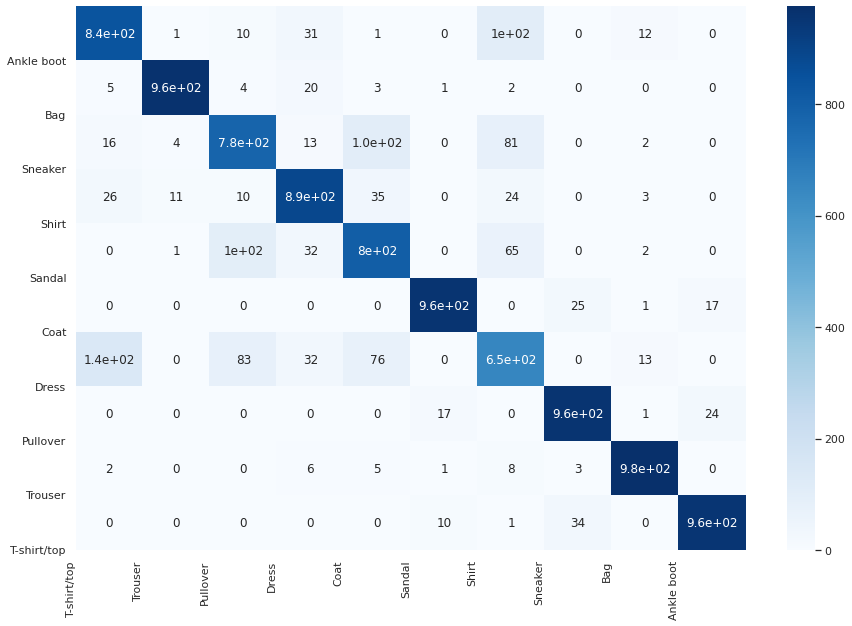

In [259]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xticks(np.arange(0,10,1), class_names, rotation=90, ha='right')
plt.yticks(np.arange(10,0,-1), class_names, rotation=0, va='center')
plt.show()

# Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [266]:
np.where(test_labels == 0)[0]

array([  19,   27,   35,   59,   71,   85,   88,   96,  113,  120,  121,
        125,  141,  142,  143,  155,  164,  170,  177,  180,  201,  206,
        223,  229,  235,  260,  263,  264,  272,  275,  280,  284,  304,
        305,  332,  341,  355,  359,  370,  374,  381,  395,  400,  403,
        410,  440,  452,  454,  458,  463,  464,  472,  488,  489,  499,
        501,  531,  544,  547,  566,  577,  589,  605,  610,  616,  625,
        636,  646,  651,  652,  656,  672,  674,  677,  681,  691,  703,
        714,  719,  720,  731,  736,  737,  751,  755,  764,  770,  858,
        859,  881,  889,  890,  894,  906,  908,  910,  916,  926,  930,
        937,  948,  951,  954,  955,  959,  965,  985, 1000, 1005, 1038,
       1049, 1052, 1060, 1069, 1111, 1124, 1139, 1158, 1169, 1203, 1205,
       1207, 1214, 1216, 1218, 1231, 1249, 1252, 1260, 1270, 1273, 1285,
       1287, 1293, 1295, 1305, 1340, 1358, 1364, 1371, 1372, 1379, 1399,
       1403, 1412, 1428, 1450, 1451, 1452, 1463, 14

In [267]:
np.random.choice(np.where(test_labels == 0)[0])

6812

In [273]:
test_data[6812].shape

(28, 28)

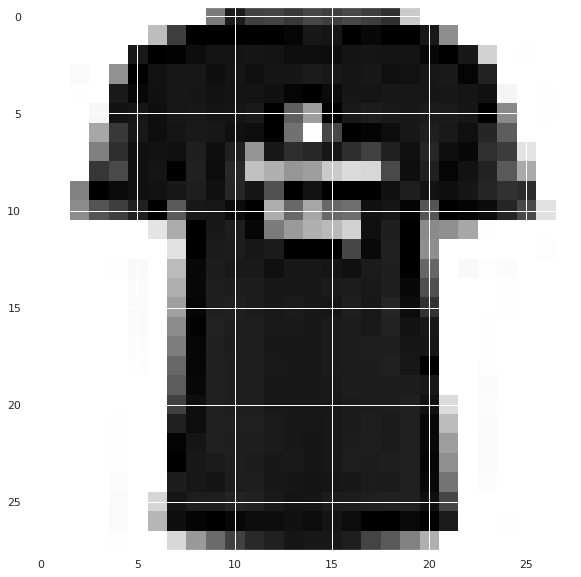

In [280]:
plt.imshow(test_data[6812], cmap=plt.cm.binary)

In [291]:
def eval_3(test_data, model, viz='T-shirt/top'):

  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  val = class_names.index(viz)

  options = np.where(test_labels == val)

  for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    rand_index = np.random.choice(options[0])
    pred = model.predict(tf.expand_dims(test_data[6812], axis=0))
    max = pred.argmax(axis=1)
    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    plt.suptitle(class_names[val])
    plt.title(f'{class_names[val]} True \n {class_names[max[0]]} Predicted')
    plt.axis(False)
  plt.show()

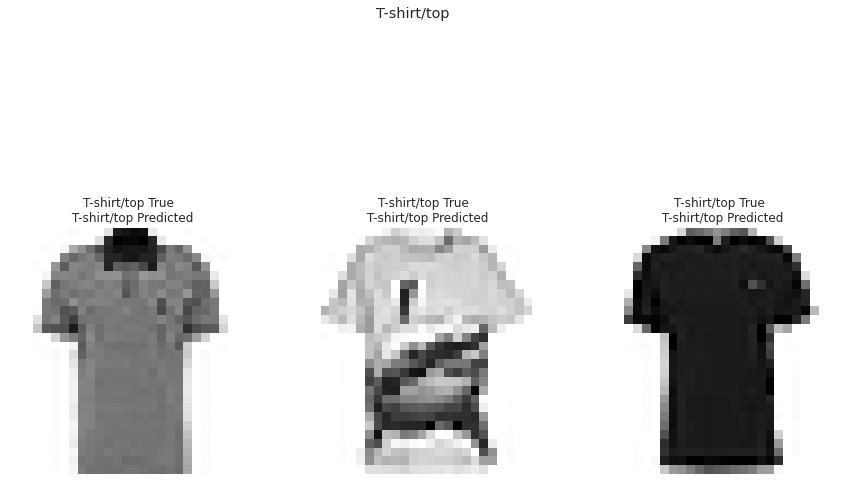

In [298]:
eval_3(test_data, model)